<!-- <table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. Created for CS/MATH 3414 by Arash Sarshar.</td>
 <td> </td>
</table> -->

# Machine Arithmetic


---


## Binary numbers

We want to represent real numbers in fromat amenable to computer hardware. 


$$ x \in \mathbb{R}, \\
x =  \pm ( \cdots + b_n 2^n + b_{n-1}2^{n-1} + \cdots + b_0 + b_{-1}2^{-1} + \cdots ), \quad b_i  \in \{ 0,1\}. $$


or in short form
$$x = \pm ( \cdots b_n b_{n-1} \cdots b_0 b_{-1} \cdots )_2$$

### Example 1

* Convert 9.25 from decimal to binary:

$9.25 = 8 + 1 + \frac{1}{4} = 2^3 + 2^1 +  2^{-2}  = (1001.01)_2$

In [71]:
import numpy as np
import matplotlib.pyplot as plt


### Example 2

* Convert 1.2 from decimal to binary:

$ \begin{align*}
1.2 &= 1\cdot 2^0 + \cdots \\
    &= 1\cdot 2^0 + 0\cdot 2^{-1} + \cdots \\
    &= 1\cdot 2^0 + 0\cdot 2^{-1} + 0\cdot 2^{-2 }+ \cdots \\
    &= 1\cdot 2^0 + 0\cdot 2^{-1} + 0\cdot 2^{-2 }+ 1\cdot 2^{-3} + 0.075 \\ 
    &= 1\cdot 2^0 + 0\cdot 2^{-1} + 0\cdot 2^{-2 }+ 1\cdot 2^{-3} + 1 \cdot 2^{-4} + 0 \cdot 2^{-5} + \cdots  \\
    & = (1.00110\cdots)_2
\end{align*}$

What's odd in this example? 


0.07500000000000001


Is this representation
 * finite?
 * unique? 

$0.011111 \cdots \overset{?}{=} 0.1$

 (hint $\sum_{i=0} 2^{-i}$ is convergent)

In [2]:
x = np.array([2**(-i) for i in range(0,  20)])
print('%1.32f'% np.sum(x))

1.99999809265136718750000000000000



---


## Machine Numbers


We need to limit the representation to a fixed byte size.

###  Fixed point numbers
$$
 x^\star := \pm (\,c_{n-1}\,c_{n-2}\,\cdots\, c_{0}.\ b_{-1}\,b_{-2}\,\cdots\, b_{-t})_2
$$
* Is this a good scheme for storing numers?

###  Floating point numbers
$$ \begin{align*}
 x^\star & := m\cdot 2^e, \\
 m &= \pm (0 .\,b_{-1}\,b_{-2}\,\cdots\, b_{-t})_2,  \\
  e &= \pm (\,c_{s-1}\,c_{s-2}\,\cdots\, c_{0}. \,0)_2,  \\
  c_i, m_i &\in \{0,1 \},
 \end{align*}$$



 * What are the peculiarities of the mantissa and  exponent scheme?
 * How many bits does it take to store this numebr?
 * We assume $b_{-1} = 1$ and call it *normalized*.  
 Why? 
 (hint: multiplication by 2 is a shift)
 * How we reprenset 0 in this form ? Any other special cases  missing  ?
 * Can we represent every real number in this form? 
 * Underflow and overflow 



In [5]:
from numpy import  binary_repr
def my_int2bin(a, width= 8):
    string = binary_repr(a, width)
    return string

# powers is just shifts in bin
print(my_int2bin(5))
print(my_int2bin(5*2))

00000101
00001010


In [6]:
a = int(2**16 -1 )
print(my_int2bin(a, 8))
print(my_int2bin(a +1 , 8))

1111111111111111
10000000000000000


<ipython-input-5-8707fab5a6be>:3: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  string = binary_repr(a, width)


In [32]:
np.finfo(float).min 

-1.7976931348623157e+308

In [31]:
np.finfo(float).tiny

2.2250738585072014e-308

In [33]:
np.finfo(float).nmant,np.finfo(float).nexp

(52, 11)

What are the largest and smalles positive numbers that can be  represented  in this form? 
* $\min |x^\star| = 2^{- 2^s} $
* $ max |x^\star| =  (1- 2^{-t}) \cdot 2^{2^s -1} $

How does the spread of these  numbers look like? 

 ![https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Denormalized_numbers_on_a_line.svg/1000px-Denormalized_numbers_on_a_line.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Denormalized_numbers_on_a_line.svg/1000px-Denormalized_numbers_on_a_line.svg.png)
[licensed under CC BY-SA 3.0 by Blacklemon67]

Actual standards in use: Float (single precision), double(precision), etc. (Refer to [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754#Basic_and_interchange_formats)) for examples.




0.5



---


## The error in machine representation

How much error are we making when usingmachine representation? 

### Chopping

 `0.001 011` 1 $\to$ `0.001 011`

\begin{align*}
 x &= 2^e \sum_{k=1}^{\infty} b_{-k} 2^{-k}  \\
  x^\star &=   \text{chop}(x) = 2^e \sum_{k=1}^{t} b_{-k} 2^{-k}\\
  |x-x^\star| & = 2^e \left \vert \sum_{k=t+1}^{\infty} b_{-k} 2^{-k} \right \vert \leq  2^e\left \vert \sum_{k=t+1}^{\infty} 2^{-k} \right \vert = 2^{-t} \cdot 2^e, \\
  \frac{|x-x^\star|}{|x|} & = \frac{2^{-t} \cdot 2^e}{\left \vert \sum_{k=1}^{\infty} b_{-k} 2^{-k} \right \vert 2^e} = 2\cdot 2^{-t}.
\end{align*}


### Rounding

 `0.001 011` 1 $\to$ `0.001 100`
 
 `0.001 011` 0 $\to$ `0.001 011`

\begin{align*}
 x &= 2^e \sum_{k=1}^{\infty} b_{-k} 2^{-k},\\
  x^\star &=\text{round}(x) = \text{chop}(x + 2^{-t-1} \cdot 2^e) = 2^e \sum_{k=1}^{t} b^\star_{-k} 2^{-k}\\
  |x-x^\star| & 
  \leq  \left \vert \frac{1}{2} \cdot 2^{-t} \cdot 2^e \right \vert, \\
  \frac{|x-x^\star|}{|x|} & \leq  \frac{|\frac{1}{2} \cdot 2^{-t}\cdot 2^e|}{|\frac{1}{2}\cdot 2^e|} \leq 2^{-t}.
\end{align*}


### Machine precision

 $ M_\epsilon:= 2^{-t}$

$ x^\star = \text{round}(x) = x(1+\varepsilon), \quad  \varepsilon \leq|M_\epsilon|, \quad x^\star\in$ `float` $\quad x\in \mathbb{R}. $ 

In [ ]:
 0.01010 1111
 
 0.01011 0

In [34]:
import numpy
numpy.finfo(float).eps


2.220446049250313e-16

In [35]:
numpy.power(2, -52.0)

2.220446049250313e-16

## Error propagation in simple arithmetic operations

Now that we have error bounds for the way numbers are stored in a computer let's investigate how these errors interact when performing mathematical operations.

* Multiplication 

$$
\begin{align*}
x^\star &= x(1+\varepsilon_x), \\
y^\star &= y(1+\varepsilon_y), \\
x^\star \cdot y^\star & \overset{?}{=}  x \cdot y (1 +\varepsilon_T )  \\[10pt]
 & = x \cdot y (1 + \varepsilon_x + \varepsilon_y +  \varepsilon_x \cdot \varepsilon_y) \\
 & \approx x \cdot y (1 + \varepsilon_x + \varepsilon_y ), \\
  \Rightarrow   \varepsilon_T &=   \varepsilon_x + \varepsilon_y, \\
  | \varepsilon_T| &\leq  |\varepsilon_x| + |\varepsilon_y| \leq 2 M_\epsilon.
\end{align*}
$$


* Division 

$$
\begin{align*}
\frac{x^\star}{y^\star} & \overset{?}{=}  \frac{x}{y} (1 +\varepsilon_T )  \\[10pt]
 & = \frac{x}{y} \frac{(1 + \varepsilon_x )}{(1 + \varepsilon_y )} \qquad \qquad \text{Lemma:}  \frac{1}{1+\varepsilon_y} = 1 - \varepsilon_y +\varepsilon_y^2 - \cdots \\
  & \approx \frac{x}{y}  (1 + \varepsilon_x)(1 - \varepsilon_y ), \\
 & \approx  \frac{x}{y}  (1 + \varepsilon_x - \varepsilon_y ), \\
  \Rightarrow   \varepsilon_T &=   \varepsilon_x - \varepsilon_y, \\
    | \varepsilon_T| &\leq 2 M_\epsilon.
\end{align*}
$$

* Addition

$$
\begin{align*}
x^\star + y^\star & \overset{?}{=} (x + y ) \cdot (1+ \varepsilon_T)  \\[10pt]
& =   x + y  + x\cdot \varepsilon_x + y\cdot \varepsilon_x \\
& =  (x + y) \cdot ( 1 + \frac{x}{x+y} \cdot  \varepsilon_x  + \frac{y}{x+y}\cdot \varepsilon_y ),\\
  \Rightarrow   \varepsilon_T &=    \frac{x}{x+y} \cdot  \varepsilon_x  + \frac{y}{x+y}\cdot \varepsilon_y.
\end{align*}
$$

* Are these operations benign? 
* What can go wrong in `Cancellation error`

In [55]:
a=1000000.0001
b=1000000.0000

In [58]:
np.abs(((a**2 - 2*a*b) + b**2) - (a-b)**2)

0.0001220803124893084

In [59]:
np.abs(((a**2 + b**2) - 2*a*b ) - (a-b)**2)

9.999989308419701e-09

### Condition of a problem

We would like to have a measure of how _unruly_ a numerical problem is. Let's assume a problem maps input $x$ to output $y$ using a mapping $f$
$$ y = f(x), \quad x,y \in \mathbb{R} $$

#### Perturbed problems
If the input is slightly poerturbed:
$$
\begin{align*}
y^\star &= f(x^\star) = f(x + \Delta x)   = y +  \Delta y.
\end{align*}
$$
We would  like to extablish a relation between the reltaive errors in the input and outout:
$$
\frac{\Delta y}{y}  \approx \frac{x f'(x)}{f(x)} \frac{\Delta x}{x} .
$$

Define __condition number__ as :

$$\text{cond}_f := \left \vert \frac{x f'(x)}{f(x)}  \right \vert. $$


#### Example: 

$$
\begin{align*}
f(x) & = \frac{x+1}{x-1}, \qquad f'(x) = \frac{-2}{(x-1)^2}, \\[10pt]
\frac{\Delta y}{y}  & \approx \frac{-2 x}{(x-1) (x+1)} \frac{\Delta x}{x} 
\end{align*}
$$



What if x belongs to a floating point number system?

$$ \frac{\Delta y}{y}   \approx \frac{-2 x}{(x-1) (x+1)} M_\epsilon  $$

In [96]:
def  rel_err(x):
    return  (-2.0*x)/((x-1)*(x+1))*np.finfo(float).eps

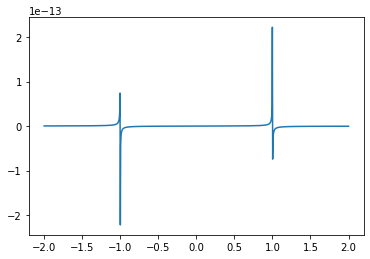

In [97]:
%matplotlib inline
x = np.linspace(-2,2,1000)
plt.plot(x, rel_err(x))

In [108]:
rel_err(1.00000001)

-2.22044607384724e-08

* How bad is this? 
* What can be done ?